<a href="https://colab.research.google.com/github/bilalProgTech/mtech-nmims/blob/master/deep-learning/Lab-Work/20220922-Lab-9-MTech-DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle datasets download -d d4rklucif3r/cat-and-dogs
!kaggle datasets download -d gaborfodor/keras-pretrained-models

 92% 201M/218M [00:04<00:00, 62.6MB/s]
100% 218M/218M [00:04<00:00, 51.5MB/s]
 98% 923M/943M [00:08<00:00, 104MB/s] 
100% 943M/943M [00:08<00:00, 112MB/s]


In [ ]:
!unzip cat-and-dogs.zip
!unzip keras-pretrained-models.zip

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf

from IPython.display import Image, display

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
!nvidia-smi

Fri Sep 23 12:17:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

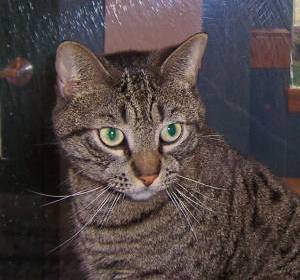

In [6]:
display(Image('/content/dataset/training_set/cats/cat.1.jpg'))

In [9]:
'/content/dataset/training_set/cats/cat.1.jpg'.split('/')[-2]

'cats'

In [7]:
import os

In [10]:
files = []
for dirname, _, filenames in os.walk('/content/dataset/training_set'):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))

data = pd.DataFrame({'filename': files})
data['class'] = data['filename'].str.split('/').str[-2]
data = data.sample(frac=1)
data = data.reset_index(drop=True)
data.head()

,filename,class
0,/content/dataset/training_set/cats/cat.2715.jpg,cats
1,/content/dataset/training_set/dogs/dog.920.jpg,dogs
2,/content/dataset/training_set/dogs/dog.773.jpg,dogs
3,/content/dataset/training_set/dogs/dog.1821.jpg,dogs
4,/content/dataset/training_set/cats/cat.445.jpg,cats


In [11]:
data.shape

(8000, 2)

In [12]:
from sklearn.model_selection import train_test_split

In [26]:
train, test = train_test_split(data, test_size=0.20)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

train.shape, test.shape

((6400, 2), (1600, 2))

Image Data Generator

In [27]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255, 
                                                                shear_range=0.2, 
                                                                zoom_range=0.2, 
                                                                horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(dataframe=train, 
                                                    directory='/content/dataset/training_set', 
                                                    target_size=(128, 128), 
                                                    class_mode='binary') #categorical

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_dataframe(dataframe=test, 
                                                  directory='/content/dataset/training_set', 
                                                  target_size=(128, 128), 
                                                  class_mode='binary') #categorical

Found 6400 validated image filenames belonging to 2 classes.
Found 1600 validated image filenames belonging to 2 classes.


# Basic CNN model

In [28]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(128, 128, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 16)                2

In [29]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
200/200 [==============================] - 43s 211ms/step - loss: 0.6931 - accuracy: 0.4922 - val_loss: 0.6932 - val_accuracy: 0.4775
Epoch 2/10
200/200 [==============================] - 47s 235ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.4775
Epoch 3/10
200/200 [==============================] - 41s 203ms/step - loss: 0.6931 - accuracy: 0.5056 - val_loss: 0.6935 - val_accuracy: 0.4775
Epoch 4/10
200/200 [==============================] - 38s 192ms/step - loss: 0.6931 - accuracy: 0.5056 - val_loss: 0.6936 - val_accuracy: 0.4775
Epoch 5/10
200/200 [==============================] - 39s 193ms/step - loss: 0.6931 - accuracy: 0.5056 - val_loss: 0.6938 - val_accuracy: 0.4775
Epoch 6/10
200/200 [==============================] - 40s 200ms/step - loss: 0.6931 - accuracy: 0.5056 - val_loss: 0.6936 - val_accuracy: 0.4775
Epoch 7/10
200/200 [==============================] - 38s 191ms/step - loss: 0.6931 - accuracy: 0.5056 - val_loss: 0.6937 - val_ac

In [31]:
model.evaluate(test_generator)

50/50 [==============================] - 4s 81ms/step - loss: 0.6938 - accuracy: 0.4775


[0.6937716007232666, 0.47749999165534973]

# VGG 16

In [36]:
tf.keras.backend.clear_session()

image_size = 224

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255, 
                                                                shear_range=0.2, 
                                                                zoom_range=0.2, 
                                                                horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(dataframe=train, 
                                                    directory='/content/dataset/training_set', 
                                                    target_size=(image_size, image_size), 
                                                    class_mode='binary') #categorical

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_dataframe(dataframe=test, 
                                                  directory='/content/dataset/training_set', 
                                                  target_size=(image_size, image_size), 
                                                  class_mode='binary') #categorical


from keras.applications.vgg16 import VGG16

weight_path = '/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
vgg16_base_model = VGG16(weights=weight_path, 
                         include_top=False, 
                         input_shape=(image_size, image_size, 3))

for layer in vgg16_base_model.layers:
    layer.trainable = False

vgg16_pretrained_model = tf.keras.Sequential([
    vgg16_base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
vgg16_pretrained_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
vgg16_pretrained_model.summary()

Found 6400 validated image filenames belonging to 2 classes.
Found 1600 validated image filenames belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,926,209
Trainable params: 3,211,521
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, verbose=1)
history = vgg16_pretrained_model.fit(train_generator, epochs=10, validation_data=test_generator, callbacks=callback)

In [ ]:
vgg16_pretrained_model.evaluate(test_generator)

In [ ]:
tf.keras.backend.clear_session()

image_size = 224

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255, 
                                                                shear_range=0.2, 
                                                                zoom_range=0.2, 
                                                                horizontal_flip=True)

train_generator = train_datagen.flow_from_directory('/content/training_set/training_set', 
                                                    target_size=(image_size, image_size), 
                                                    class_mode='binary') #categorical

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_directory('/content/test_set/test_set', 
                                                    target_size=(image_size, image_size), 
                                                    class_mode='binary') #categorical


from keras.applications.vgg16 import VGG16

weight_path = '/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
vgg16_base_model = VGG16(weights=weight_path, 
                         include_top=False, 
                         input_shape=(image_size, image_size, 3))

for layer in vgg16_base_model.layers:
    layer.trainable = True

vgg16_pretrained_model = tf.keras.Sequential([
    vgg16_base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
vgg16_pretrained_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
vgg16_pretrained_model.summary()
history = vgg16_pretrained_model.fit(train_generator, epochs=10, validation_data=test_generator)
vgg16_pretrained_model.evaluate(test_generator)

# InceptionV3

In [21]:
tf.keras.backend.clear_session()

image_size = 224

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255, 
                                                                shear_range=0.2, 
                                                                zoom_range=0.2, 
                                                                horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(dataframe=train, 
                                                    directory='/content/dataset/training_set', 
                                                    target_size=(image_size, image_size), 
                                                    class_mode='binary') #categorical

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_dataframe(dataframe=test, 
                                                  directory='/content/dataset/training_set', 
                                                  target_size=(image_size, image_size), 
                                                  class_mode='binary') #categorical

Found 6400 validated image filenames belonging to 2 classes.
Found 1600 validated image filenames belonging to 2 classes.


In [22]:
from keras.applications.inception_v3 import InceptionV3

In [23]:
weight_path = '/content/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
inception_base_model = InceptionV3(weights=weight_path, 
                         include_top=False, 
                         input_shape=(image_size, image_size, 3))

for layer in inception_base_model.layers:
    layer.trainable = False

inception_pretrained_model = tf.keras.Sequential([
    inception_base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
inception_pretrained_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
inception_pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 128)               6553728   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 28,356,641
Trainable params: 6,553,857
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
history = inception_pretrained_model.fit(train_generator, epochs=10, validation_data=test_generator)

In [ ]:
inception_pretrained_model.evaluate(test_generator)

# Xception

In [38]:
tf.keras.backend.clear_session()

image_size = 299

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255, 
                                                                shear_range=0.2, 
                                                                zoom_range=0.2, 
                                                                horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(dataframe=train, 
                                                    directory='/content/dataset/training_set', 
                                                    target_size=(image_size, image_size), 
                                                    class_mode='binary') #categorical

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_dataframe(dataframe=test, 
                                                  directory='/content/dataset/training_set', 
                                                  target_size=(image_size, image_size), 
                                                  class_mode='binary') #categorical

Found 6400 validated image filenames belonging to 2 classes.
Found 1600 validated image filenames belonging to 2 classes.


In [39]:
from keras.applications.xception import Xception

In [40]:
weight_path = '/content/xception_weights_tf_dim_ordering_tf_kernels_notop.h5'
xception_base_model = Xception(weights=weight_path, 
                         include_top=False, 
                         input_shape=(image_size, image_size, 3))

for layer in xception_base_model.layers:
    layer.trainable = False

xception_pretrained_model = tf.keras.Sequential([
    xception_base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
xception_pretrained_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
xception_pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 dense (Dense)               (None, 128)               26214528  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 47,076,137
Trainable params: 26,214,657
Non-trainable params: 20,861,480
_________________________________________________________________


In [41]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, verbose=1)
history = xception_pretrained_model.fit(train_generator, epochs=10, validation_data=test_generator, callbacks=callback)

Epoch 1/10
200/200 [==============================] - 144s 701ms/step - loss: 3.6294 - accuracy: 0.7609 - val_loss: 0.5386 - val_accuracy: 0.9638
Epoch 2/10
200/200 [==============================] - 140s 697ms/step - loss: 0.7250 - accuracy: 0.9525 - val_loss: 0.5921 - val_accuracy: 0.9613
Epoch 3/10
200/200 [==============================] - 138s 690ms/step - loss: 0.8065 - accuracy: 0.9475 - val_loss: 0.3947 - val_accuracy: 0.9744
Epoch 4/10
200/200 [==============================] - 138s 690ms/step - loss: 0.4774 - accuracy: 0.9689 - val_loss: 2.1209 - val_accuracy: 0.8625
Epoch 5/10
200/200 [==============================] - 139s 696ms/step - loss: 0.7200 - accuracy: 0.9533 - val_loss: 0.4813 - val_accuracy: 0.9688
Epoch 6/10
200/200 [==============================] - 138s 690ms/step - loss: 1.4565 - accuracy: 0.9048 - val_loss: 0.3157 - val_accuracy: 0.9794
Epoch 7/10
200/200 [==============================] - 138s 691ms/step - loss: 0.2579 - accuracy: 0.9831 - val_loss: 0.3537 -

In [42]:
inception_pretrained_model.evaluate(test_generator)

InvalidArgumentError: ignored